# Introduction to Neural Networks
## Part 1: Perceptrons


### Why Neural Networks? Why Machine Learning?

Recent developments in neural networks have "created" these art works.
![A Neural Algorithm of Artistic Style, Leon A. Gatys, Alexander S. Ecker, Matthias Bethge](https://thestack.com/wp-content/uploads/2015/09/starry-night.jpg)
taken from a paper on [A Neural Algorithm of Artistic Style by Leon A. Gatys, Alexander S. Ecker, Matthias Bethge](http://arxiv.org/pdf/1508.06576.pdf)

## Consider a single neuron cell

![A Neuron](https://upload.wikimedia.org/wikipedia/commons/b/bd/Neuron.jpg)
Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/b/bd/Neuron.jpg)

If the stimulus to a neuron cell is above a "threshold", the cell is activated and will release a tiny electrical impulse to the next cells which it is connected with.

### How could this be represented mathematically?
![Structure of a single perceptron](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)
Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)

$$ f(x) = \begin{cases}1 & \text{if }\vec{x} \cdot \vec{w} + w_0 > 0\\0 & \text{otherwise}\end{cases} $$

### Mathematical Representation of a Single Layer Perceptron

$$ w = \begin{bmatrix}
         w_1 \\
         \vdots \\
         w_n
        \end{bmatrix} 
   x = \begin{bmatrix}
         x_1 \\
         \vdots \\
         x_n
        \end{bmatrix}
$$

#### Linear Activation Function

\begin{equation*}
z = x^T * w + w_0
\end{equation*}

\begin{equation*}
\phi(z) = \begin{cases}
1\ if\ z > 0 \\
0\ otherwise
\end{cases}
\end{equation*}


#### How does the single layer perceptron learn?

1. Initialize the weights with zero values
2. For each training sample, compute the predicted $y$ and update the weights accordingly

\begin{equation*} 
\Delta w = \eta(y_{training set}^{(i)} - y_{predicted}^{(i)}) x^{(i)} \\
w = w + \Delta w \\
\end{equation*}


In [6]:
# install all required packages with 'pip install -r requirements.txt'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

In [7]:
class Perceptron(object):
    """
    
    Perceptron classifier.

    Adopted from Python Machine Learning by Sebastian Raschka (see below)

    """
    def __init__(self, learning_rate=0.01, epoches=10):
        self.learning_rate = learning_rate
        self.epoches = epoches
        
    def fit(self, X, y):
        """This method will fit the perceptron activation function to match the training set"""
        
        # set self.weights to a zero value
        # check out a numpy method, get the dimension of the input vector X 
        # with `X.shape[1]`
    
        self.weights = numpy.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epoches):
            errors = 0
            for xi, expected_y in zip(X, y):
                 # update the update rule
                update = self.learning_rate * (self.predict(xi) - expected_y ) 
                self.weights[1:] += update * xi # update the weights for x[1:n]
                self.weights[0] += update # update the weight x[0]
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self    
    
    def net_input(self, X):
        """This method will calculate the dot product of the input vector x multiplied with the vector of the weights.
           Don't forget the bias w_0
        """
        ### TASK: Calculate this sum of the multipled vectors x and w. You can either do this by using the numpy.dot
        ### method or by using a for loop (the numpy.dot method will be faster but less intuitive)
        return numpy.dot(X, self.weights[1:]) + self.weights[0] 
        

    def predict(self, X):
        """Return class label after unit step"""
        ### TASK: Take a result from self.net_input(X) and classify it. 
        ### Return 1 if the result is greater than 0, other return 1
        ## return self.net_input[numpy.where( X > 0 )]
        return numpy.where(self.net_input(X) > 0.0, 1, 0 )
      
    
    def feature_scaling(self, X):
        """ Scales features between 0 and 1 """
        # perform feature scaling on each column
        for col in list(X.columns.values):
            X[col] = X[col] / X[col].max()
        return X
        
    def plot(self, X, y, 
             cols=[0, 1], 
             axis_labels=['x', 'y'], 
             _max_samples=100,
             save=False
            ):
        max_samples = _max_samples if _max_samples < len(y) else len(y)
        X = X[0:max_samples, cols]
        for i in range(0, max_samples):
            if int(y[i]) == 1:
                color='red'
                marker='o'
            else:
                color='blue'
                marker='x'
            plt.scatter(
                X[i][cols[0]], X[i][cols[1]],
                color=color, marker=marker, )

        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
        plt.show()
 
    def plot_errors(self):
        plt.plot(range(1, len(p.errors) + 1), p.errors, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of misclassifications')
        plt.show()

        
    def cross_val_score(self, X, y):
        """Returns the CV matrix for a model and its expected results"""
        # set variables
        _pred_y = self.predict(X)
        cov_results = numpy.zeros((2,2))
        # Check for positives and negatives
        positions = (
            list(numpy.where(y != 1))[0],
            list(numpy.where(y == 1))[0]
        )
        for res in [0, 1]:
            # get total number of pos/neg samples
            total = len(positions[res])
            # loop through sample positions
            for pos in list(positions[res]):
                # check postives
                if y[pos] == 1:
                    if _pred_y[pos] == 1:
                        cov_results[1, 1] += 1
                    else:
                        cov_results[1, 0] += 1
                # check not positives (could be -1 or 0)
                else:
                    if _pred_y[pos] != 1:
                        cov_results[0, 0] += 1
                    else:
                        cov_results[0, 1] += 1
            # divide results by the number of samples in the category (positive/negative)
            cov_results[res, :] /= total
        return cov_results

### OR Examples, solved by a single Perceptron

('Prediction: ', array([0, 0, 0, 0]))
Cross validation: 
[[ 1.  0.]
 [ 1.  0.]]


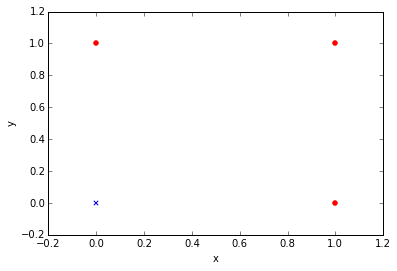

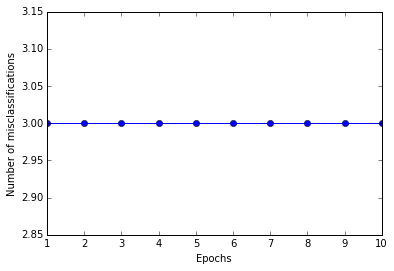

In [8]:
# OR example

data_set = numpy.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

p = Perceptron(0.01, 10)
p.fit(data_set[:, :2], data_set[:, 2:])
print ('Prediction: ', p.predict(data_set[:, :2]))
print ('Cross validation: ')
print p.cross_val_score(data_set[:, :2], data_set[:, 2:])
p.plot(data_set[:, :2], data_set[:, 2])
p.predict(data_set[:, :2])
p.plot_errors()


### Iris dataset
Determine the type of Irises (in this case, we classify between setosa and versicolor). The classic data originates from the [UCI dataset server](http://archive.ics.uci.edu/ml/) and is one of the most downloaded sets so far. An overview of the different input variables can be found [here](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_dataset_scatterplot.svg).
For this tutorial, let's classify the Irises by the sepal and petal length.

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import numpy

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = numpy.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

In [ ]:
p = Perceptron(learning_rate=0.1, epoches=10)

p.fit(X, y)
p.plot(X, y)
p.plot_errors()

In [ ]:
p.cross_val_score(X, y)

In [ ]:
print y
print p.predict(X)

### Credit card fraud dectection

In [13]:
# https://onlinecourses.science.psu.edu/stat857/node/215
import pandas as pd
training_set = pd.read_csv('..data/German_credit_card_test_500.csv')
#test_set = pd.read_csv('..data/german_credit_dataset/Test50.csv')

IOError: File ..data/German_credit_card_test_500.csv does not exist

In [ ]:
# drop id column from training/test set
training_set.drop('ID', axis=1, inplace=True)

# inspect dataset
print training_set.columns
# training_set.head()
training_set.head()  # training_set.tail()

In [ ]:
# perform feature scaling on each column
for col in list(training_set.columns.values):
    training_set[col] = training_set[col] / training_set[col].max()
training_set.head()

In [ ]:
# extract the creditability column as y vector
y = training_set['Creditability'].values
# drop the creditability column from the dataset
training_set.drop('Creditability', axis=1, inplace=True)
# remaining dataset is used as input matrix
X = training_set.values

In [ ]:
p = Perceptron(0.0001, 1000)
p.fit(X, y)
p.predict(X[:3])

In [ ]:
print p.cross_val_score(X, y)
p.plot(training_set[['Account.Balance', 'Purpose']].values, y)
p.plot_errors()

### Try the XOR Problem

In [ ]:
# XOR problem

data_set = numpy.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

p = Perceptron(0.01, 10)
p.fit(data_set[:, :2], data_set[:, 2])
print ('Prediction: ', p.predict(data_set[:, :2]))
print ('Cross validation: ')
print p.cross_val_score(data_set[:, :2], data_set[:, 2])
p.plot(data_set[:, :2], data_set[:, 2], axis_labels=['x1', 'x2'])

In [ ]:
# XOR problem solved with a single layer perceptron

data_set = numpy.array([
    # index, (x1+x2)^2, output
    [0, 0, 0],
    [1, 1, 1],
    [2, 1, 1],
    [3, 4, 0]
])

p = Perceptron(0.001, 1000)
p.fit(data_set[:, :2], data_set[:, 2])
print ('Prediction: ', p.predict(data_set[:, :2]))
print ('Cross validation: ')
print p.cross_val_score(data_set[:, :2], data_set[:, 2])
p.plot(data_set[:, [0,1]], data_set[:, 2], axis_labels=['x1', 'x2'])
p.predict([3,4])

### Why isn't the perceptron working for the XOR example?
### What needs to be adapted?